### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [37]:
pd.set_option('display.float_format', '{:,.2f}'.format)

dataframes = [tienda, tienda2, tienda3, tienda4]
ingresos = {f"Tienda {i+1}": df["Precio"].sum() for i, df in enumerate(dataframes)}
pd.Series(ingresos, name="Ingreso Total")

,Ingreso Total
Tienda 1,"1,150,880,400.00"
Tienda 2,"1,116,343,500.00"
Tienda 3,"1,098,019,600.00"
Tienda 4,"1,038,375,700.00"


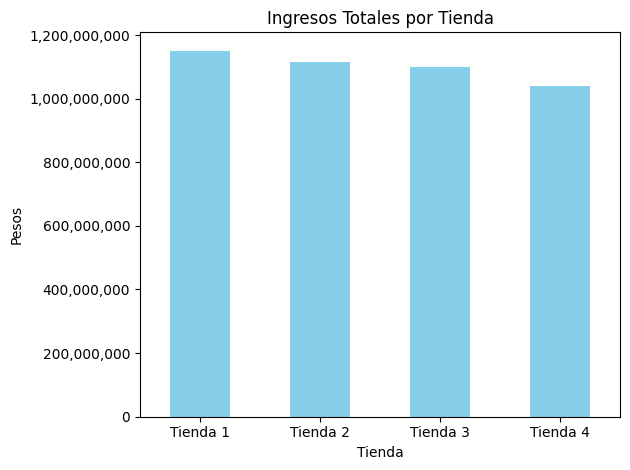

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

serie_ingresos = pd.Series(ingresos)
ax = serie_ingresos.plot(kind="bar", title="Ingresos Totales por Tienda", ylabel="Pesos", xlabel="Tienda", color='skyblue')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [24]:
ventas_categoria = {f"Tienda {i+1}": df["Categoría del Producto"].value_counts() for i, df in enumerate(dataframes)}
ventas_categoria["Tienda 1"]

,count
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


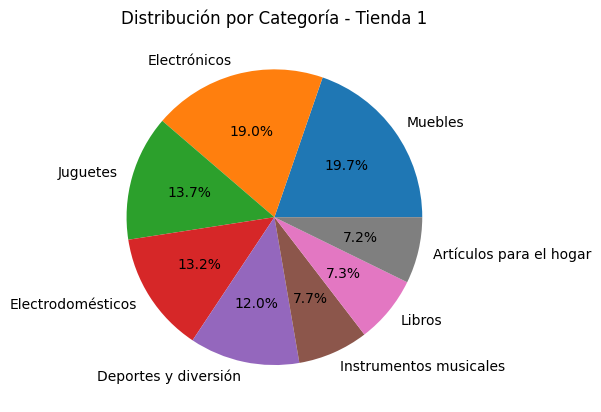

In [33]:
ventas_categoria["Tienda 1"].plot(kind="pie", autopct='%1.1f%%', title="Distribución por Categoría - Tienda 1")
plt.ylabel("")
plt.show()

In [22]:
ventas_categoria = {f"Tienda {i+1}": df["Categoría del Producto"].value_counts() for i, df in enumerate(dataframes)}
ventas_categoria["Tienda 2"]

,count
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


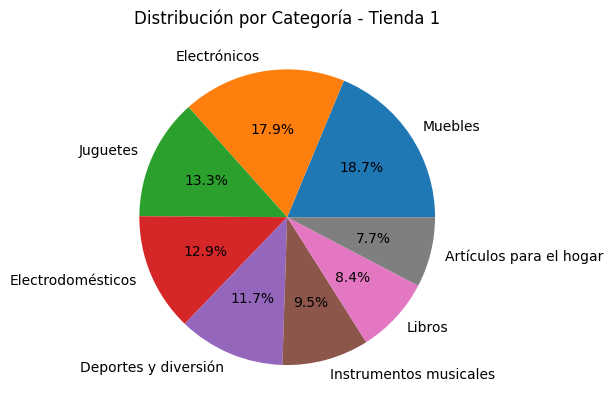

In [34]:
ventas_categoria["Tienda 2"].plot(kind="pie", autopct='%1.1f%%', title="Distribución por Categoría - Tienda 1")
plt.ylabel("")
plt.show()

In [26]:
ventas_categoria = {f"Tienda {i+1}": df["Categoría del Producto"].value_counts() for i, df in enumerate(dataframes)}
ventas_categoria["Tienda 3"]

,count
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Instrumentos musicales,177
Artículos para el hogar,177


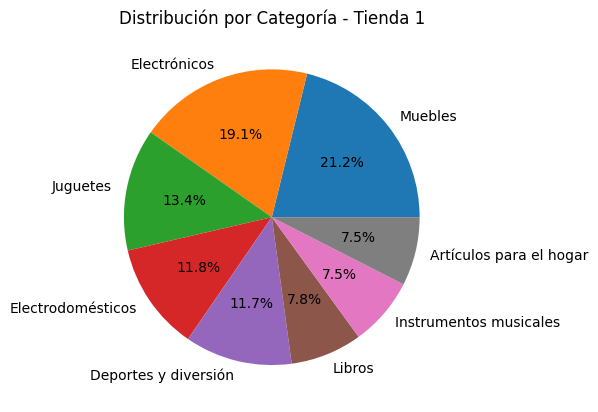

In [35]:
ventas_categoria["Tienda 3"].plot(kind="pie", autopct='%1.1f%%', title="Distribución por Categoría - Tienda 1")
plt.ylabel("")
plt.show()

In [25]:
ventas_categoria = {f"Tienda {i+1}": df["Categoría del Producto"].value_counts() for i, df in enumerate(dataframes)}
ventas_categoria["Tienda 4"]

,count
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


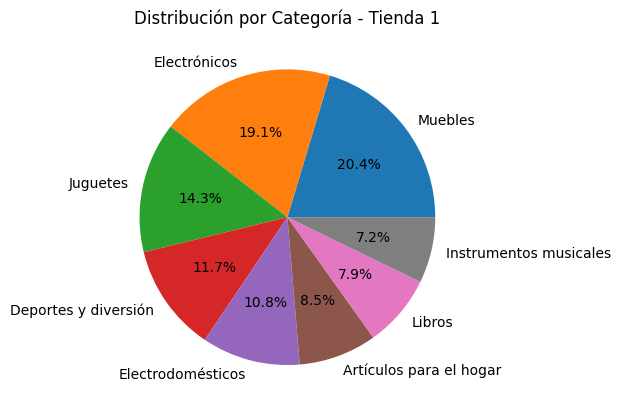

In [36]:
ventas_categoria["Tienda 4"].plot(kind="pie", autopct='%1.1f%%', title="Distribución por Categoría - Tienda 1")
plt.ylabel("")
plt.show()

# 3. Calificación promedio de la tienda


In [9]:
calificaciones = {f"Tienda {i+1}": df["Calificación"].mean() for i, df in enumerate(dataframes)}
pd.Series(calificaciones, name="Calificación Promedio")

,Calificación Promedio
Tienda 1,3.976685
Tienda 2,4.037304
Tienda 3,4.048326
Tienda 4,3.995759


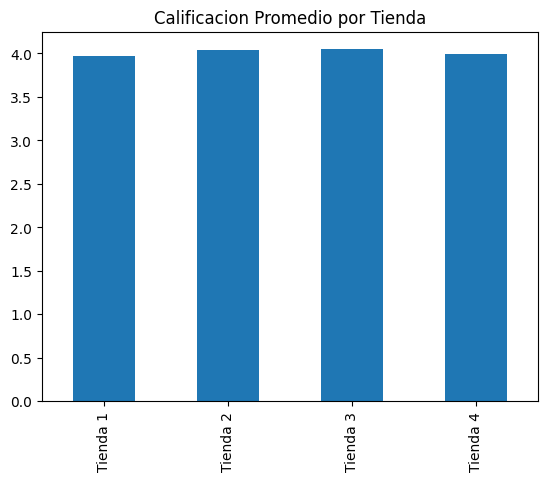

In [43]:
pd.Series(calificaciones).plot(kind="bar", title="Calificacion Promedio por Tienda")
plt.show()

# 4. Productos más y menos vendidos

In [28]:
def productos_extremos(df):
    ventas = df["Producto"].value_counts()
    return ventas.idxmax(), ventas.max(), ventas.idxmin(), ventas.min()

for i, df in enumerate(dataframes, start=1):
    max_prod, max_ventas, min_prod, min_ventas = productos_extremos(df)
    print(f"Producto mas vendido de la tienda {i} es: {max_prod} ({max_ventas}) y El Producto menos vendido es: {min_prod} ({min_ventas})")

Producto mas vendido de la tienda 1 es: Microondas (60) y El Producto menos vendido es: Auriculares con micrófono (33)
Producto mas vendido de la tienda 2 es: Iniciando en programación (65) y El Producto menos vendido es: Juego de mesa (32)
Producto mas vendido de la tienda 3 es: Kit de bancas (57) y El Producto menos vendido es: Bloques de construcción (35)
Producto mas vendido de la tienda 4 es: Cama box (62) y El Producto menos vendido es: Guitarra eléctrica (33)


# 5. Envío promedio por tienda

In [31]:
envios = {f"Tienda {i+1}": df["Costo de envío"].mean() for i, df in enumerate(dataframes)}
pd.Series(envios, name="Promedio de Envio")

,Promedio de Envio
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167


# ***Informe***


La Tienda 1 genera más ventas que las otras, lo cual indica una alta demanda y visibilidad.

La Tienda 3 tiene mejor calificacion por parte de los clientes.

Por esto si el Sr. Juan quiere vender una tienda deberia ser la Tienda 4, aunque el conto de envio de los productos es bajo, tiene la menor cantidad de ingresos y su calificacion esta por debajo de 4 estrellas.